COMPARACION DE METODOS

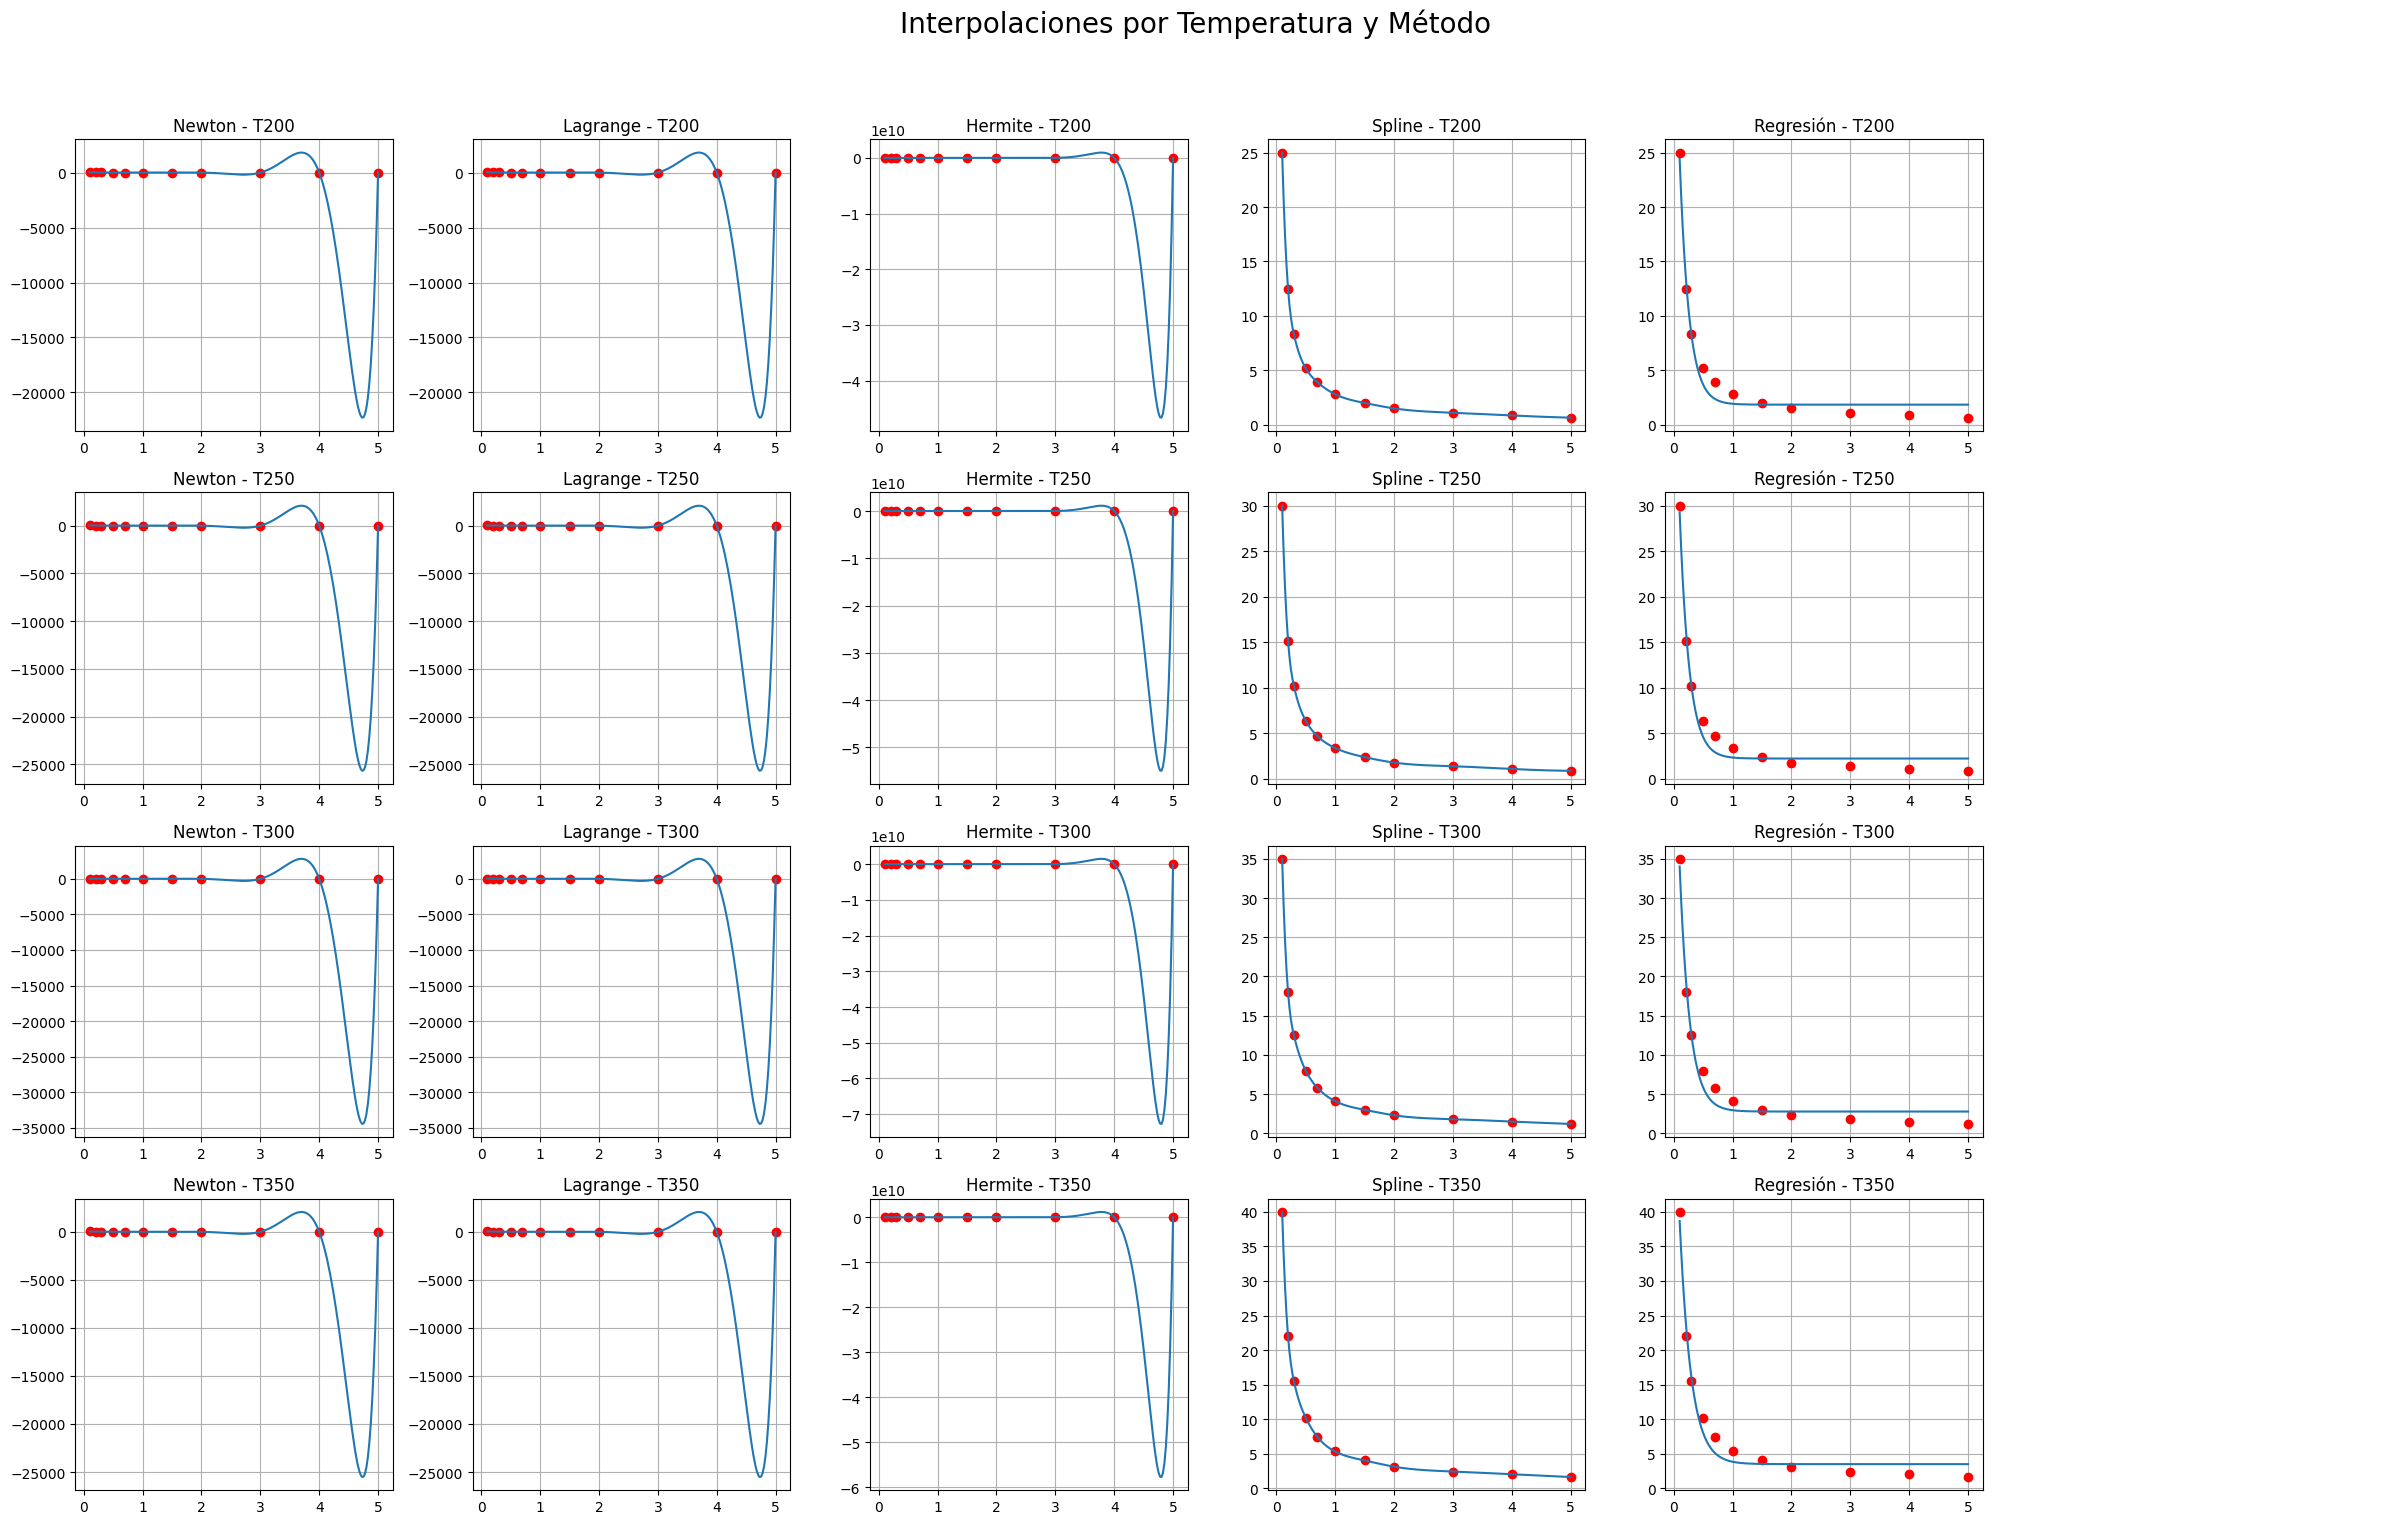

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator, CubicSpline, lagrange
from scipy.optimize import curve_fit

# Tus datos
datos = {
    'T200': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [25.0,12.5,8.3,5.2,3.9,2.8,2.0,1.5,1.1,0.85,0.65]},
    'T250': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [30.0,15.2,10.2,6.4,4.7,3.4,2.4,1.8,1.4,1.1,0.9]},
    'T300': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [35.0,18.0,12.5,8.0,5.8,4.1,3.0,2.3,1.8,1.5,1.2]},
    'T350': {'P': [0.1,0.2,0.3,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0], 'V': [40.0,22.0,15.5,10.2,7.4,5.3,4.0,3.1,2.4,2.0,1.6]},
}

# Derivadas para Hermite
derivadas_por_temperatura = {
    'T200': {0.2: -83.50000,0.3: -24.33333,0.5: -11.00000,0.7: -4.80000,1.0: -2.37500},
    'T250': {0.2: -99.00000,0.3: -29.33333,0.5: -13.75000,0.7: -6.00000,1.0: -2.87500},
    'T300': {0.2: -112.50000,0.3: -33.33333,0.5: -16.75000,0.7: -7.80000,1.0: -3.50000},
    'T350': {0.2: -122.50000,0.3: -39.33333,0.5: -20.25000,0.7: -9.80000,1.0: -4.25000}
}

# Configuración de métodos
temperaturas = ['T200', 'T250', 'T300', 'T350']
metodos = ['Newton', 'Lagrange', 'Hermite', 'Spline', 'Regresión', 'Otro']

# Crear figura 4x6
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(24, 16))
fig.suptitle("Interpolaciones por Temperatura y Método", fontsize=20)

# Loop principal
for i, temp in enumerate(temperaturas):
    x = datos[temp]['P']
    y = datos[temp]['V']

    for j, metodo in enumerate(metodos):
        ax = axs[i, j]
        try:
            if metodo == 'Newton':
                # Newton ≈ Krogh sin derivadas
                f = KroghInterpolator(x, y)

            elif metodo == 'Lagrange':
                pol = lagrange(x, y)
                f = lambda xv: pol(xv)

            elif metodo == 'Hermite':
                derivadas = derivadas_por_temperatura[temp]
                x_herm = []
                y_herm = []
                for xi, yi in zip(x, y):
                    x_herm.append(xi)
                    y_herm.append(yi)
                    if xi in derivadas:
                        x_herm.append(xi)
                        y_herm.append(derivadas[xi])
                f = KroghInterpolator(x_herm, y_herm)

            elif metodo == 'Spline':
                f = CubicSpline(x, y)

            elif metodo == 'Regresión':
                def modelo(xv, a, b, c, d):
                    return a * np.exp(-b * xv / d) + c
                popt, _ = curve_fit(modelo, x, y, p0=[1, 1, 1, 1])
                f = lambda xv: modelo(xv, *popt)

            else:
                ax.axis('off')
                continue

            # Evaluar y graficar
            x_plot = np.linspace(min(x), max(x), 200)
            y_plot = f(x_plot)

            ax.plot(x, y, 'ro', label='Datos')
            ax.plot(x_plot, y_plot, label='Interpolación')
            ax.set_title(f"{metodo} - {temp}")
            ax.grid(True)

        except Exception as e:
            ax.text(0.5, 0.5, 'Error', ha='center', va='center')
            ax.set_title(f"{metodo} - {temp}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

